In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

Current folders are:
fb_output.0


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "_total_grossInvestmentQ_"]

In [5]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4,5,6,7
0,7062.088947,692.968440,2311.175184,888.334016,998.425117,1261.931309,658.670458,834.370475
1,6972.834669,918.664403,2309.717000,1413.242089,1531.902133,1957.119589,1263.942106,1899.733770
2,7049.703809,1051.581372,2275.349939,1613.487682,1601.107529,2197.400697,1943.237883,2764.720413
3,6907.563091,1104.163786,2190.329998,1671.164110,1600.144479,2369.104132,2484.625533,3489.443011
4,7092.076223,1137.523422,2368.521580,1902.644230,1644.868501,2468.424794,2990.903795,4199.891948
...,...,...,...,...,...,...,...,...
259,16687.510797,5734.709584,3499.258041,8510.919141,2668.762254,6911.333510,4212.208551,10652.036708
260,16581.512671,5690.376229,3516.617991,8317.337562,2605.539949,7179.501669,4435.825936,10318.379943
261,16617.409700,5702.569901,3355.797631,8670.449447,2658.764566,7102.715785,4572.979455,10034.336288
262,16673.353014,5793.228701,3701.987894,8881.525300,2498.383993,7287.284736,4417.010939,10063.489038


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4,5,6,7
0,24784.402778,2437.694444,6166.555556,2504.722222,3104.166667,3994.027778,2013.333333,2744.444444
1,24533.930556,3298.472222,6212.416667,3958.166667,4573.472222,6017.944444,3915.555556,5337.777778
2,24996.069444,3827.638889,6288.263889,4519.083333,5053.583333,6715.347222,5540.000000,8008.888889
3,24567.444444,4023.430556,6041.319444,4605.513889,5388.833333,7226.500000,7160.000000,10451.111111
4,25022.527778,4085.166667,6406.444444,5085.291667,5010.125000,7431.375000,8813.333333,12577.777778
...,...,...,...,...,...,...,...,...
259,58261.250000,20087.166667,9514.416667,23733.125000,8368.833333,21466.347222,12426.666667,31648.888889
260,57945.513889,19863.152778,9667.875000,22473.708333,8261.222222,22345.861111,12957.777778,30877.777778
261,57896.125000,20034.250000,9126.361111,23126.347222,8521.972222,21851.263889,13517.777778,29577.777778
262,58374.138889,20205.347222,9865.430556,23729.597222,7894.930556,22517.625000,13237.777778,30131.111111


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4,5,6,7
0,53243.481452,6210.656109,13266.030662,7085.782307,5845.746097,6186.341825,39170.168802,40158.728926
1,53493.953674,5349.878331,13220.169551,5632.337862,4376.440541,4162.425159,37267.946580,37565.395592
2,53031.814785,4820.711664,13144.322329,5071.421196,3896.329430,3465.022381,35643.502136,34894.284481
3,53460.439785,4624.919998,13391.266773,4984.990640,3561.079430,2953.869603,34023.502136,32452.062259
4,53005.356452,4563.183887,13026.141773,4505.212862,3939.787764,2748.994603,32370.168802,30325.395592
...,...,...,...,...,...,...,...,...
259,41623.783222,13501.188531,14854.625605,14476.291977,4791.356857,15968.513458,11487.050302,37911.043769
260,42094.775820,13761.698911,14768.937156,15924.228367,4992.019774,14935.410259,10946.458707,38383.516459
261,42537.448316,13773.735776,15371.537430,15395.953501,4772.413926,15306.484763,10283.818176,39329.951916
262,42061.300076,13630.332883,14636.150766,14677.483678,5440.779327,15106.002479,10663.135161,38482.113515


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,1076.743064,0.0,941.277772,0.0,0.000000,0.0,0.000000
2,0.0,2500.317447,0.0,3406.337573,0.0,0.000000,0.0,0.000000
3,0.0,4729.504397,0.0,6467.235635,0.0,2961.826528,0.0,0.000000
4,0.0,3713.071456,0.0,4843.015786,0.0,10660.534086,0.0,0.000000
...,...,...,...,...,...,...,...,...
259,0.0,20479.674995,0.0,25528.678725,0.0,18644.924648,0.0,33534.856568
260,0.0,19728.389487,0.0,27350.995728,0.0,19218.189545,0.0,38634.064600
261,0.0,19107.876274,0.0,25254.621896,0.0,22439.600352,0.0,22458.883316
262,0.0,20401.382551,0.0,28242.452462,0.0,25415.405390,0.0,27240.239495


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1,2,3,4,5,6,7
0,22861.196342,0.0,6709.954198,0.0,0.000000,0.0,0.000000,0.0
1,25328.815857,0.0,7812.347641,0.0,3132.901467,0.0,0.000000,0.0
2,25999.057638,0.0,7530.168278,0.0,3203.896561,0.0,0.000000,0.0
3,25574.180587,0.0,7368.725804,0.0,7102.255240,0.0,0.000000,0.0
4,26050.278877,0.0,7856.792222,0.0,4502.336943,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
259,60907.048290,0.0,11469.953691,0.0,7807.374769,0.0,10530.065618,0.0
260,60411.400491,0.0,11902.644549,0.0,9630.772909,0.0,11511.616816,0.0
261,60642.518528,0.0,11224.838917,0.0,7844.543413,0.0,17917.358537,0.0
262,60698.047354,0.0,12393.702095,0.0,9064.564605,0.0,10884.444691,0.0


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,0,1237.897222,0,1146.527778,0,0.000000,0,0.000000
2,0,2867.841659,0,3892.483339,0,0.000000,0,0.000000
3,0,5443.290879,0,7353.847155,0,3695.200000,0,0.000000
4,0,4260.614260,0,5575.910130,0,12735.323472,0,0.000000
...,...,...,...,...,...,...,...,...
259,0,23619.127612,0,29217.302293,0,21381.395316,0,40588.133431
260,0,22495.663728,0,31381.855512,0,21959.954001,0,43704.610197
261,0,21935.278409,0,29038.923673,0,25725.014457,0,24356.767819
262,0,23347.779912,0,32218.190666,0,28424.197438,0,32869.662281


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,2572.808333,0,2974.093056,0,4509.733333,0,3047.777778
1,0,4672.188889,0,6482.468056,0,11331.450000,0,9986.888889
2,0,5733.520833,0,7590.013889,0,18972.666667,0,19586.666667
3,0,4526.668056,0,6003.219444,0,23134.733333,0,31075.777778
4,0,5114.572222,0,7557.911111,0,19958.550000,0,43711.777778
...,...,...,...,...,...,...,...,...
259,0,20698.883333,0,28988.808333,0,62185.150000,0,281502.000000
260,0,21259.623611,0,27700.111111,0,63578.300000,0,266745.555556
261,0,22010.511111,0,30692.548611,0,62296.900000,0,269273.333333
262,0,21694.245833,0,30259.161111,0,60973.283333,0,254863.555556


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,26102.556944,0,7755.113889,0,0.000000,0,0.000000,0
1,28955.861992,0,8788.808302,0,3531.300000,0,0.000000,0
2,29737.364190,0,8612.335661,0,3897.415200,0,0.000000,0
3,29179.228775,0,8429.117383,0,8262.718639,0,0.000000,0
4,29738.649577,0,8998.949912,0,5094.063399,0,0.000000,0
...,...,...,...,...,...,...,...,...
259,69567.917255,0,13244.452887,0,9066.805977,0,11777.021471,0
260,69149.028688,0,13547.046418,0,11041.281208,0,13677.844742,0
261,69318.921252,0,12901.011591,0,8855.541632,0,20152.450148,0
262,69393.515224,0,14079.310174,0,10373.164885,0,12233.536055,0


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0.0,0,0.0,0,3576.000000,0,2418.000000,0
1,0.0,0,0.0,0,5532.866667,0,6994.000000,0
2,0.0,0,0.0,0,7564.233333,0,14080.444444,0
3,0.0,0,0.0,0,5386.350000,0,22856.888889,0
4,0.0,0,0.0,0,7122.200000,0,32387.333333,0
...,...,...,...,...,...,...,...,...
259,0.0,0,0.0,0,9858.833333,0,60429.777778,0
260,0.0,0,0.0,0,8833.216667,0,61926.222222,0
261,0.0,0,0.0,0,9960.650000,0,57965.555556,0
262,0.0,0,0.0,0,8768.650000,0,59176.000000,0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4,5,6,7
0,309.815126,28.355605,78.271564,83.676783,41.950339,79.110693,54.957010,142.038900
1,344.557363,77.491191,99.178129,145.777465,0.000000,110.834711,140.012250,0.000000
2,373.590064,116.727215,159.740563,322.118441,147.697631,117.280712,30.729098,222.463856
3,433.883719,147.190806,150.400348,209.157629,300.492695,227.496533,143.238075,574.729001
4,373.462981,95.537377,116.799874,108.563392,94.829724,25.896483,526.087422,1017.769516
...,...,...,...,...,...,...,...,...
259,914.797904,605.257170,198.934889,1306.960599,200.704801,658.530483,572.084266,5370.283183
260,893.844496,519.786931,238.050095,838.191659,323.521116,1735.647569,796.259723,5017.516112
261,854.802486,578.201709,181.754750,616.493310,459.272973,1260.844947,959.332489,4562.023331
262,965.461330,540.561789,126.739409,856.870973,362.907456,898.851476,1637.727143,6172.764382


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4,5,6,7
0,1054.805556,98.777778,201.083333,216.958333,124.166667,235.916667,153.333333,400.000000
1,1157.111111,244.097222,255.763889,363.930556,0.000000,300.125000,382.777778,0.000000
2,1259.416667,364.666667,414.513889,735.652778,404.097222,306.833333,77.777778,526.666667
3,1439.333333,445.819444,389.819444,491.888889,828.500000,559.194444,340.000000,1367.777778
4,1264.708333,294.027778,299.861111,257.916667,240.861111,76.569444,1200.000000,2333.333333
...,...,...,...,...,...,...,...,...
259,3033.888889,1830.611111,509.763889,3072.069444,548.486111,1715.263889,1342.222222,11748.333333
260,2956.277778,1592.597222,612.069444,1958.361111,848.666667,4180.472222,1785.555556,10990.555556
261,2822.222222,1749.083333,467.430556,1446.180556,1191.583333,3046.458333,2194.444444,9935.000000
262,3176.763889,1656.375000,324.555556,1942.138889,932.847222,2237.069444,3648.888889,13497.777778


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4,5,6,7
0,42532.0,4731.0,10163.0,4910.0,3542.0,4599.0,19416.0,18724.0
1,42532.0,4731.0,10163.0,4910.0,3542.0,4599.0,19416.0,18724.0
2,42532.0,4731.0,10163.0,4910.0,3542.0,4599.0,19416.0,18724.0
3,42532.0,4731.0,10163.0,4910.0,3542.0,4599.0,19416.0,18724.0
4,42532.0,4731.0,10163.0,4910.0,3542.0,4599.0,19416.0,18724.0
...,...,...,...,...,...,...,...,...
259,49464.0,15626.0,11429.0,17852.0,5210.0,15318.0,9124.0,26556.0
260,49460.0,15601.0,11353.0,17928.0,5307.0,15347.0,9124.0,26499.0
261,49425.0,15584.0,11369.0,17909.0,5307.0,15347.0,9124.0,26499.0
262,49425.0,15584.0,11369.0,17909.0,5307.0,15347.0,9124.0,26499.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4,5,6,7
0,2.323367e+06,2.564084e+05,606736.552417,3.063603e+05,353972.471798,3.653260e+05,1.424782e+06,1.582637e+06
1,2.323367e+06,2.564084e+05,606736.552417,3.063603e+05,353972.471798,3.653260e+05,1.424782e+06,1.582637e+06
2,2.323367e+06,2.564084e+05,606736.552417,3.063603e+05,353972.471798,3.653260e+05,1.424782e+06,1.582637e+06
3,2.323367e+06,2.564084e+05,606736.552417,3.063603e+05,353972.471798,3.653260e+05,1.424782e+06,1.582637e+06
4,2.323367e+06,2.564084e+05,606736.552417,3.063603e+05,353972.471798,3.653260e+05,1.424782e+06,1.582637e+06
...,...,...,...,...,...,...,...,...
259,3.310448e+06,1.178107e+06,851420.432058,1.344825e+06,526466.748812,1.437596e+06,9.674337e+05,2.795256e+06
260,3.336452e+06,1.191730e+06,860393.359074,1.347991e+06,522810.729723,1.427613e+06,9.607154e+05,2.775844e+06
261,3.338865e+06,1.194655e+06,859587.141049,1.341693e+06,525515.555949,1.458107e+06,9.672161e+05,2.756567e+06
262,3.337170e+06,1.192927e+06,857106.325935,1.341421e+06,521866.142367,1.464678e+06,9.604993e+05,2.769396e+06


'____________________________________________________________'

'_total_grossInvestmentQ_'

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
259,3035.153409,934.315889,765.890529,2297.653302,848.682977,0.000000,533.646582,0.000000
260,4284.632461,1906.891120,1301.795739,1093.580951,0.000000,0.000000,0.000000,0.000000
261,2237.309155,979.597712,452.024263,267.872037,554.058099,3533.810827,1151.971531,0.000000
262,1879.490118,574.356823,305.085185,791.079977,0.000000,1460.190806,0.000000,2795.986195


'____________________________________________________________'

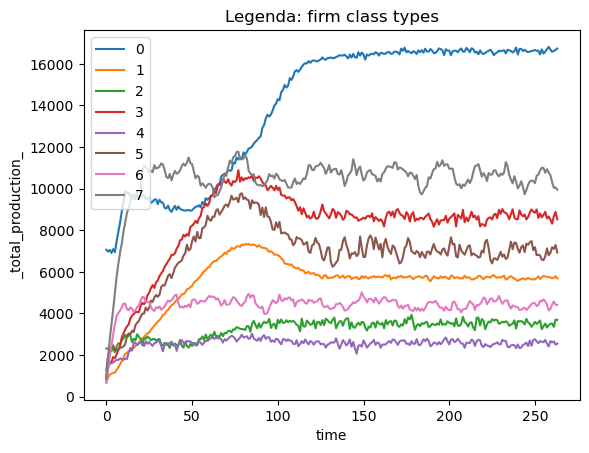

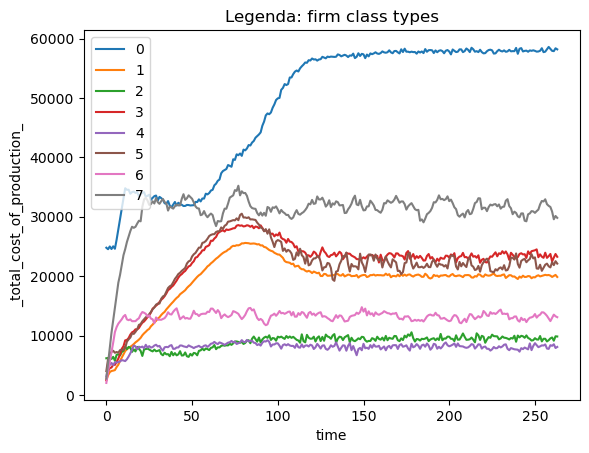

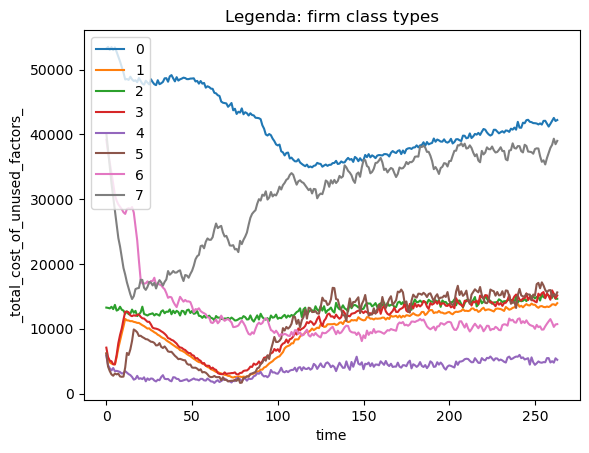

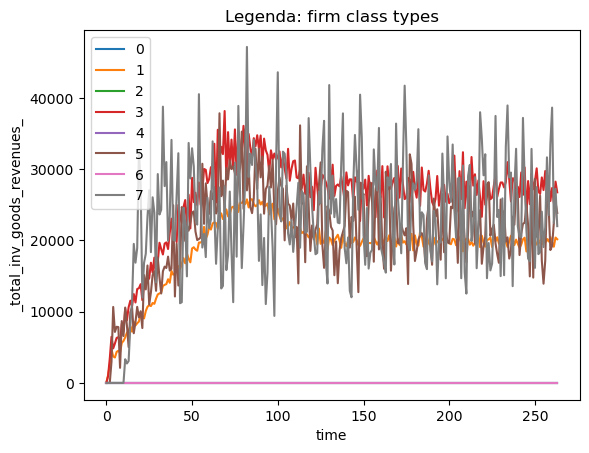

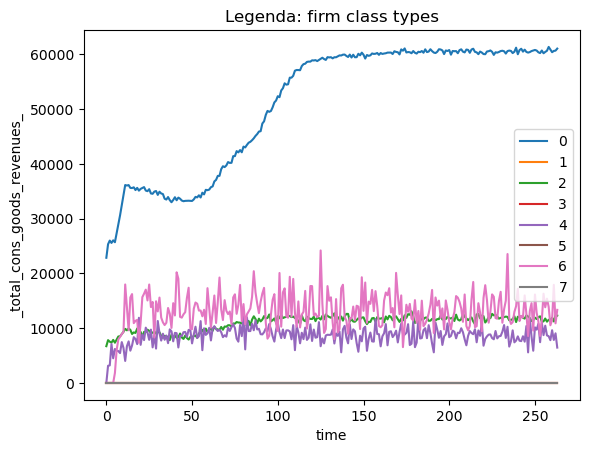

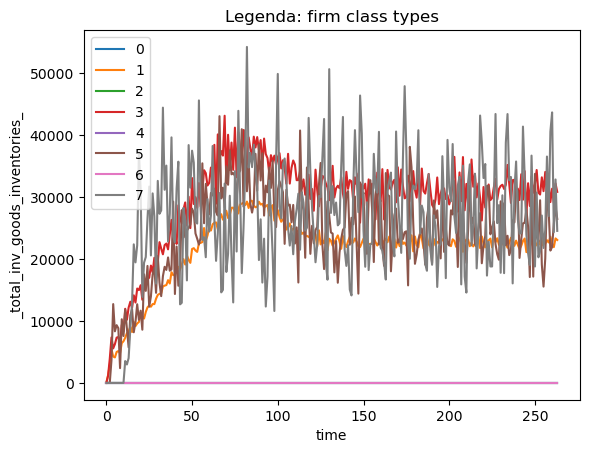

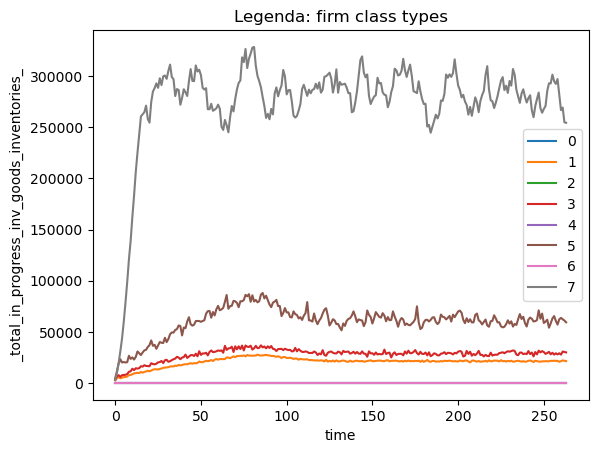

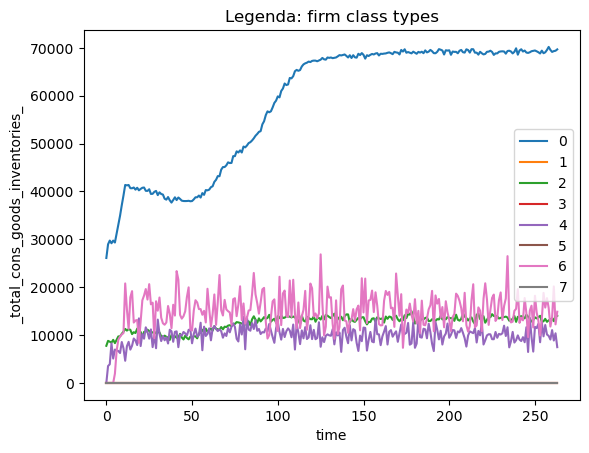

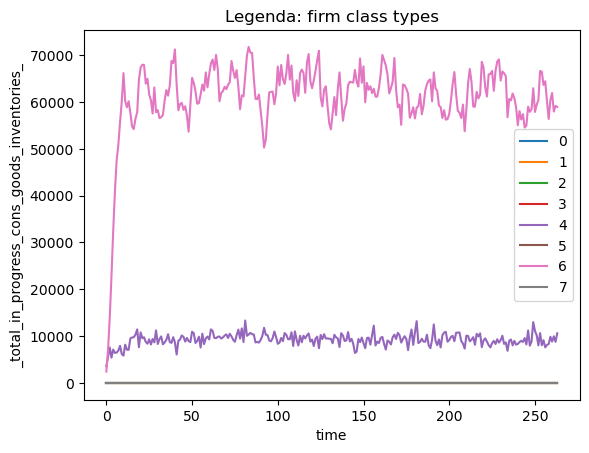

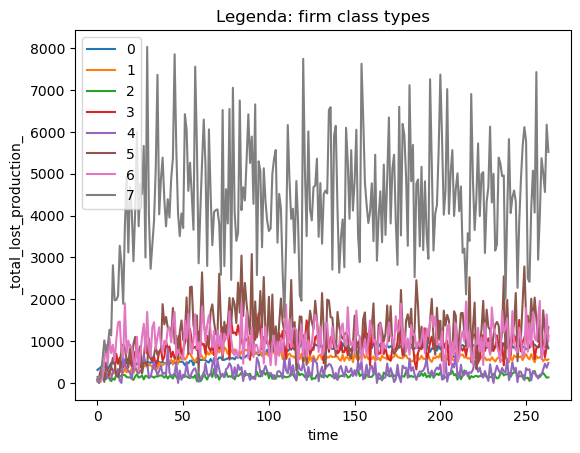

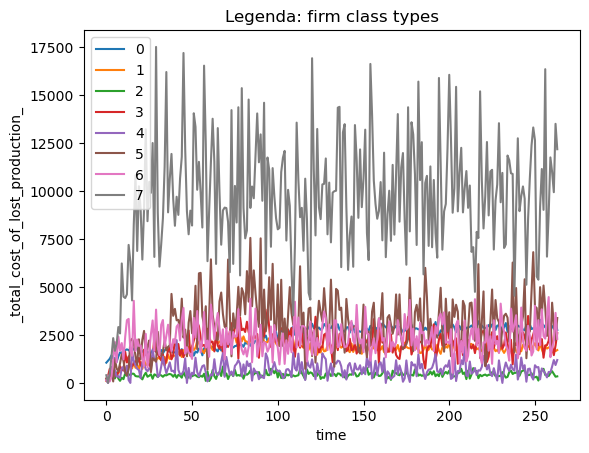

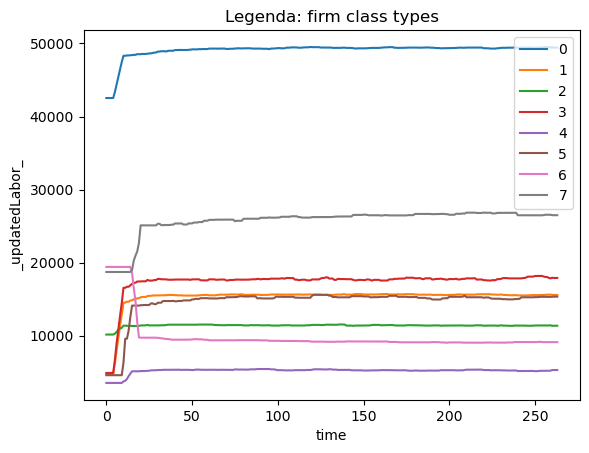

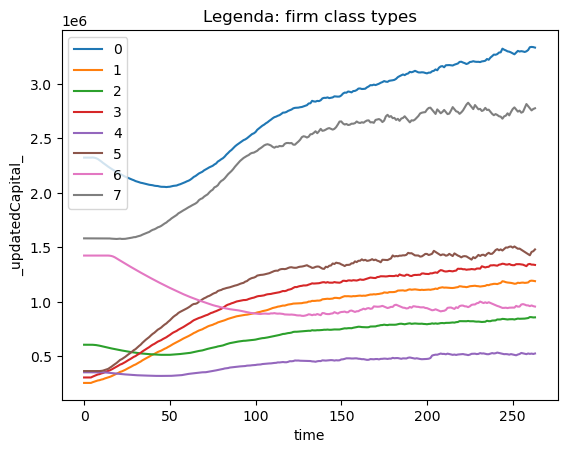

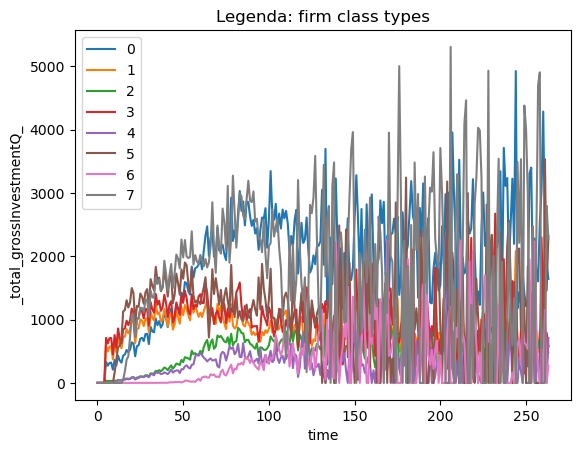

In [6]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)